## Quantifi Lending Club Test

In this notebook you will build out a simple data science workflow to solve a predictive problem.

We have included a dataset, 10K_Lending_Club_Loans.csv. This dataset comes courtesy of Lending Club, an online peer-to-peer lending website that matches those looking to borrow money with those with a little extra to lend out. Lending Club includes a number of descriptive features as well as a target (is_bad) indicating whether the loan was paid back successfully. 

Your task is to:
* Perform a simple exploratory data analysis
* Train a model to predict **is_bad**
* Evaluate accuracy
* **Answer questions about your model**

There is no right or wrong answer, this test is all about showcasing your specific style.

First, the dataset:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./10K_Lending_Club_Loans.csv")

In [3]:
df.head(20)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mths_since_last_major_derog,policy_code,is_bad
0,500,500,36 months,8.07%,15.69,A,A4,NaN,< 1 year,RENT,...,0.0,4.0,0.0,0,0.0,4.0,f,NaN,1,0
1,500,500,36 months,9.01%,15.91,B,B2,NaN,< 1 year,RENT,...,0.0,2.0,0.0,0,0.0,2.0,f,NaN,1,0
2,600,600,36 months,13.24%,20.29,D,D3,Ale House,3 years,RENT,...,0.0,2.0,0.0,195,65.0,3.0,f,NaN,1,0
3,600,600,36 months,11.54%,19.80,C,C5,NaN,< 1 year,RENT,...,0.0,4.0,0.0,228,19.0,4.0,f,NaN,1,0
4,900,900,36 months,12.92%,30.29,D,D2,NaN,< 1 year,RENT,...,NaN,4.0,0.0,3584,50.6,5.0,f,NaN,1,0
5,925,925,36 months,10.39%,30.02,B,B4,Marc Center,2 years,MORTGAGE,...,0.0,33.0,0.0,133963,16.8,63.0,f,NaN,1,0
6,1000,1000,36 months,11.89%,33.17,B,B4,fairbanks northstar borough school district,10+ years,MORTGAGE,...,NaN,5.0,0.0,5742,55.2,18.0,f,NaN,1,0
7,1000,1000,60 months,13.35%,22.94,C,C4,MedAssurant,2 years,MORTGAGE,...,NaN,9.0,0.0,7496,85.2,13.0,f,NaN,1,0
8,1000,1000,36 months,7.68%,31.19,A,A2,Adoption Center of Change,1 year,RENT,...,NaN,12.0,0.0,4782,16.7,16.0,f,NaN,1,0
9,1000,1000,36 months,14.84%,34.59,D,D1,Aurora Multimedia,< 1 year,RENT,...,NaN,11.0,0.0,0,NaN,11.0,f,NaN,1,0


In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
loan_amnt,500,500,600,600,900,925,1000,1000,1000,1000,...,35000,35000,35000,35000,35000,35000,35000,35000,35000,35000
funded_amnt,500,500,600,600,900,925,1000,1000,1000,1000,...,24400,35000,23250,35000,35000,35000,35000,35000,35000,35000
term,36 months,36 months,36 months,36 months,36 months,36 months,36 months,60 months,36 months,36 months,...,36 months,60 months,60 months,60 months,60 months,60 months,60 months,60 months,60 months,60 months
int_rate,8.07%,9.01%,13.24%,11.54%,12.92%,10.39%,11.89%,13.35%,7.68%,14.84%,...,15.23%,20.99%,20.30%,16.02%,11.71%,19.91%,22.06%,16.02%,19.91%,21.67%
installment,15.69,15.91,20.29,19.8,30.29,30.02,33.17,22.94,31.19,34.59,...,848.59,946.68,619.88,851.51,773.44,925.54,967.86,851.51,925.54,960.11
grade,A,B,D,C,D,B,B,C,A,D,...,C,F,E,D,B,E,F,D,E,F
sub_grade,A4,B2,D3,C5,D2,B4,B4,C4,A2,D1,...,C5,F3,E5,D5,B3,E4,F4,D5,E4,F3
emp_title,NaN,NaN,Ale House,NaN,NaN,Marc Center,fairbanks northstar borough school district,MedAssurant,Adoption Center of Change,Aurora Multimedia,...,Whitechapel Gallery,Cox Communications,Prospect Transportation Inc.,Heritage Healthcare at High Point,Dominion Youth Services,CSS Building Services,Motiva Enterprises,Federal Aviation Administration,NaN,Triple Canopy
emp_length,< 1 year,< 1 year,3 years,< 1 year,< 1 year,2 years,10+ years,2 years,1 year,< 1 year,...,4 years,10+ years,5 years,< 1 year,6 years,9 years,10+ years,10+ years,7 years,3 years
home_ownership,RENT,RENT,RENT,RENT,RENT,MORTGAGE,MORTGAGE,MORTGAGE,RENT,RENT,...,RENT,MORTGAGE,RENT,MORTGAGE,MORTGAGE,RENT,RENT,MORTGAGE,MORTGAGE,MORTGAGE


In [5]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'mths_since_last_major_derog', 'policy_code',
       'is_bad'],
      dtype='object')

## Perform exploratory data analysis here:
* Explore a few features visually
* Explore the target output

#### Firstly, let's review information such as statistical info, data type, memory usage, and if ther's null value ####


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amnt                    10000 non-null  int64  
 1   funded_amnt                  10000 non-null  int64  
 2   term                         10000 non-null  object 
 3   int_rate                     10000 non-null  object 
 4   installment                  10000 non-null  float64
 5   grade                        10000 non-null  object 
 6   sub_grade                    10000 non-null  object 
 7   emp_title                    9408 non-null   object 
 8   emp_length                   9741 non-null   object 
 9   home_ownership               10000 non-null  object 
 10  annual_inc                   9999 non-null   float64
 11  verification_status          10000 non-null  object 
 12  pymnt_plan                   10000 non-null  object 
 13  url              

#### looking at above, we can see that there are some missing values in some columns. Since we not necessary will use all columns for our prediction, we will leave this as it is for now and come back to it during data cleaning stage. ####

#### Next, let's look at the "is_bad" targeting variable. Let's take a quick look to see if we have enough data from different classes to train the model. ####  

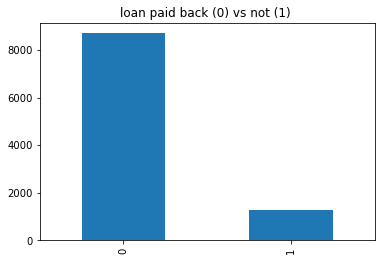

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

df['is_bad'].value_counts().plot(kind = 'bar')
plt.title('loan paid back (0) vs not (1) ')

plt.show()

#### We can see that we might have a unbalancing classification problem to work with. Note that we are assuming 0 is paid back, 1 is not. In a real life scenerio, it is a good idea to make attempts to confirm or verify our assumptions with data provider(s). ####

#### now, let's quickly identify correlations if any in between some of the features

<AxesSubplot:>

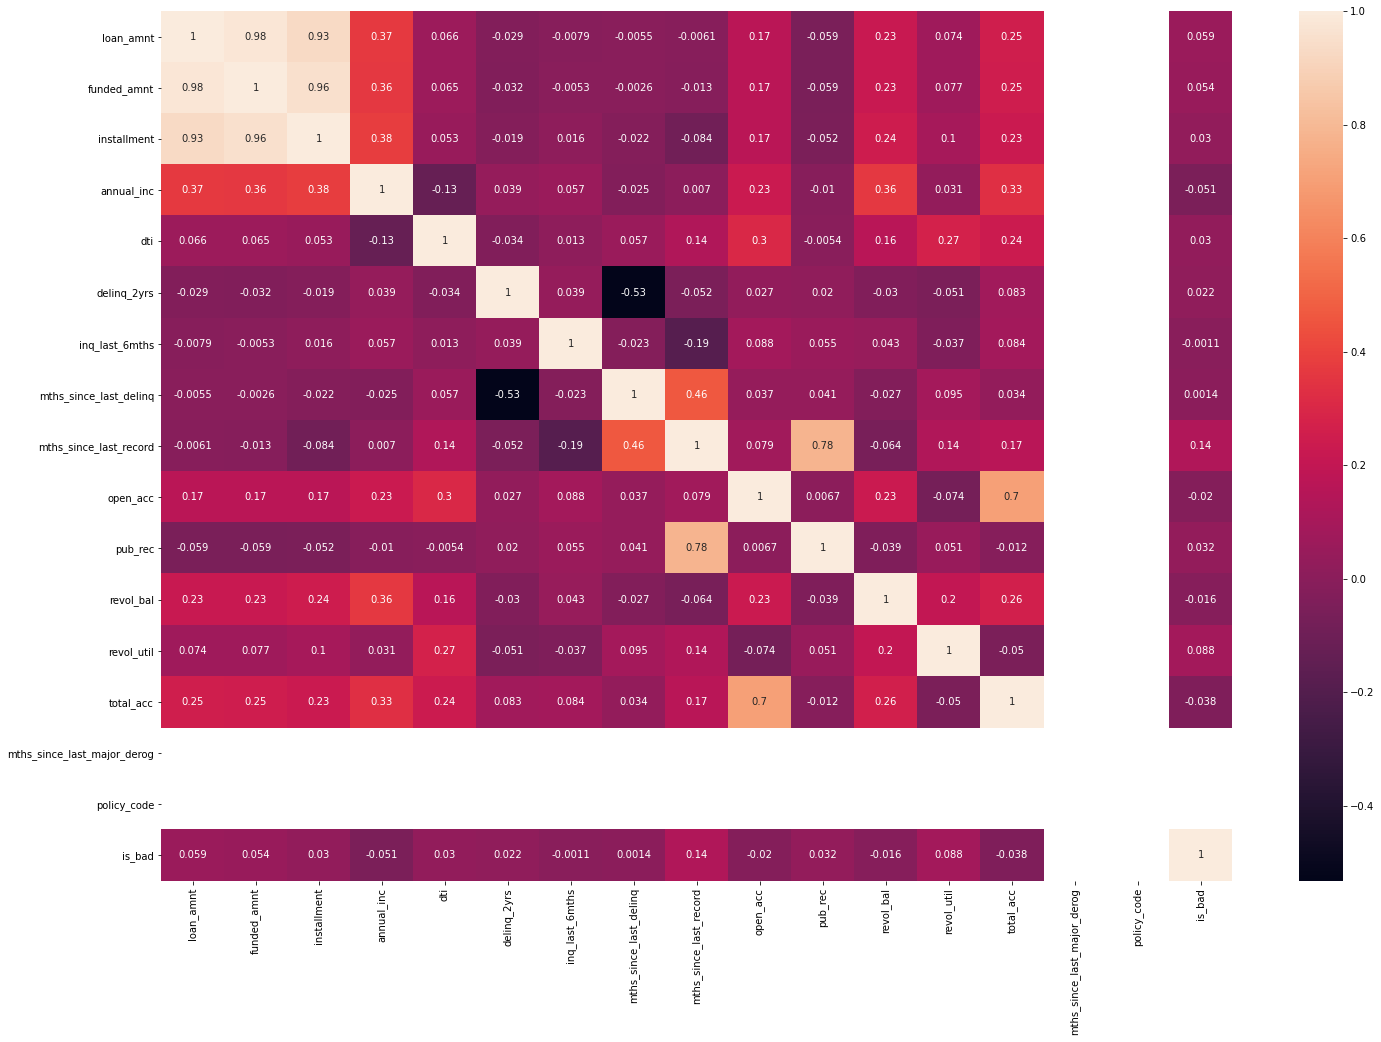

In [8]:
# heatmap
plt.figure(figsize=(24,16))
sns.heatmap(df[::-1].corr(), annot=True)

#### Looking at above, it's clear that there's very strong linear correlation in between loan amount, funded amount and installment features - which means which means some of these info may be redundant during the model training stage and it is better to only keep one of them (eg. loan_amnt) to avoide the curse of dimensionality problem, and purhaps improve model performance.

In [9]:
# let's also see the correlation in between these features and the targeting variable. 
corr_matrix = df.corr()
print(corr_matrix["is_bad"].sort_values(ascending=False))

# note that any features with very low absolute value of correlation will also be removed later. 

is_bad                         1.000000
mths_since_last_record         0.135735
revol_util                     0.087594
loan_amnt                      0.058709
funded_amnt                    0.054109
pub_rec                        0.032174
dti                            0.029873
installment                    0.029511
delinq_2yrs                    0.021842
mths_since_last_delinq         0.001358
inq_last_6mths                -0.001146
revol_bal                     -0.016202
open_acc                      -0.020356
total_acc                     -0.038250
annual_inc                    -0.050975
mths_since_last_major_derog         NaN
policy_code                         NaN
Name: is_bad, dtype: float64


In [10]:
#### next let's also graphically review some of the data with statistical info

In [11]:
df.groupby(by='is_bad')['loan_amnt'].describe()


,count,mean,std,min,25%,50%,75%,max
is_bad,,,,,,,,
0,8705.0,10866.421597,7334.495832,500.0,5000.0,9325.0,15000.0,35000.0
1,1295.0,12172.220077,8224.075351,1000.0,5500.0,10000.0,17000.0,35000.0


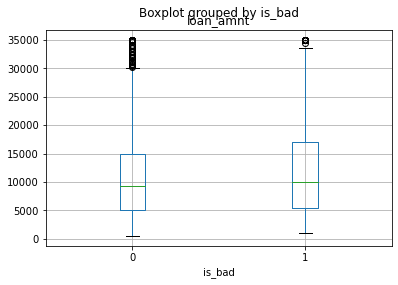

----------------------------------------------------------------


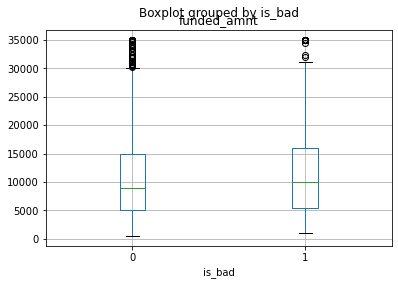

----------------------------------------------------------------


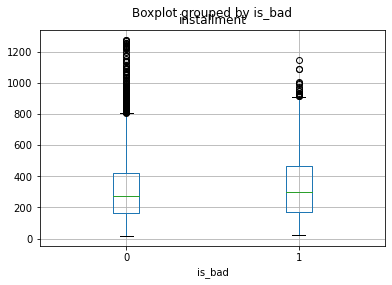

----------------------------------------------------------------


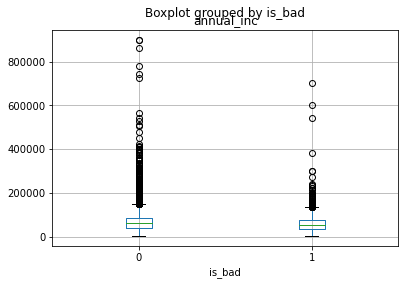

----------------------------------------------------------------


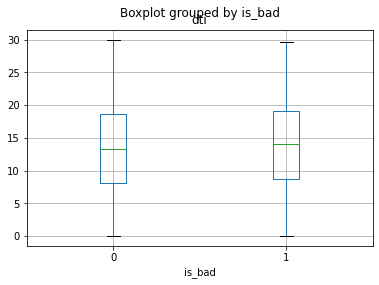

----------------------------------------------------------------


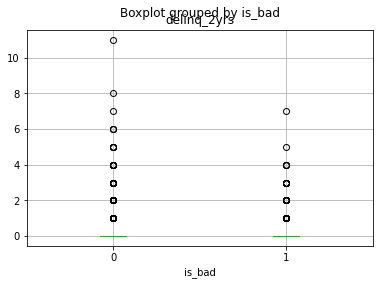

----------------------------------------------------------------


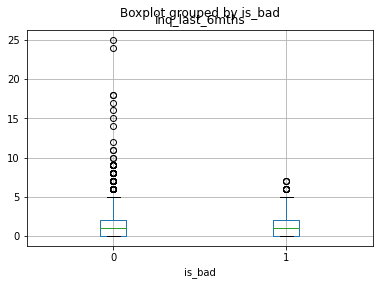

----------------------------------------------------------------


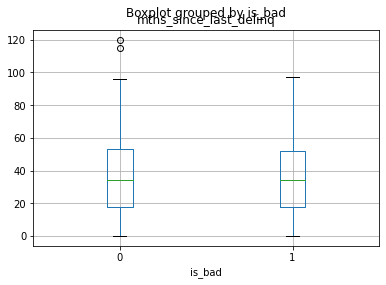

----------------------------------------------------------------


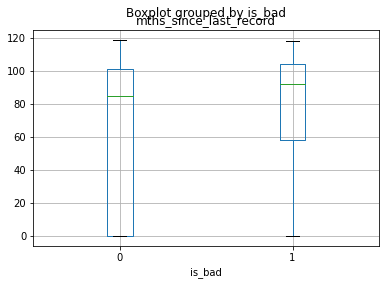

----------------------------------------------------------------


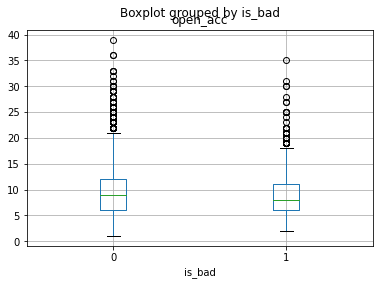

----------------------------------------------------------------


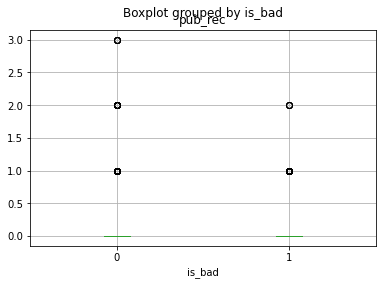

----------------------------------------------------------------


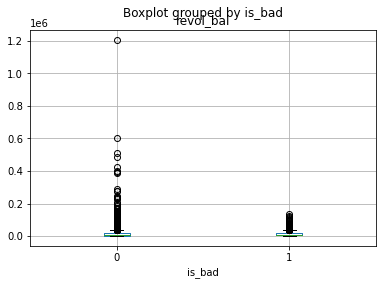

----------------------------------------------------------------


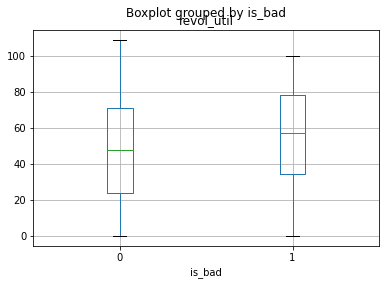

----------------------------------------------------------------


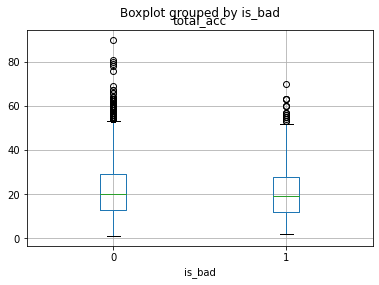

----------------------------------------------------------------


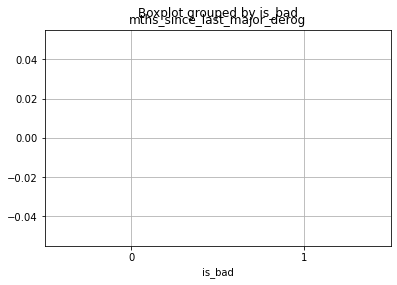

----------------------------------------------------------------


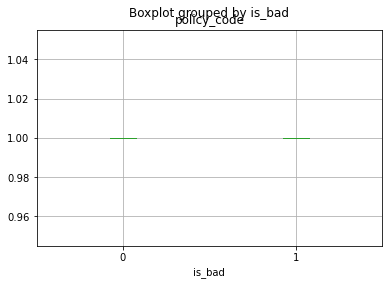

----------------------------------------------------------------


In [12]:
# iterating the features to quickly visualize the statistical info and distribution of data based on the target variable
#for col in df.columns[:-1]: 

df_selected = df.select_dtypes(include=['int64','float64']).columns    
    
for col in df_selected[:-1]:  # excluding the is_bad feature    
#    print(col)
    try:
        df.boxplot(column =[col], by = 'is_bad')
        plt.show()
        print('----------------------------------------------------------------')
    except: 
        print('not applicable for the feature, perhaps some data cleaning and data transforming needed: ' + col )
        print('----------------------------------------------------------------')

In [13]:
# next, iterating the features to quickly check the unique values for each features

for col in df:
    print('column: %s' % col)
    print(df[col].unique())
    print('total count of unique value: %d' % df[col].nunique())
    print('\n')

column: loan_amnt
[  500   600   900   925  1000  1025  1050  1100  1200  1250  1275  1300
  1325  1350  1400  1450  1475  1500  1550  1600  1675  1700  1750  1775
  1800  1825  1900  1925  1950  2000  2050  2100  2200  2250  2275  2300
  2350  2400  2425  2475  2500  2525  2600  2650  2700  2725  2750  2800
  2825  2875  2900  2950  2975  3000  3025  3050  3075  3100  3150  3175
  3200  3250  3300  3325  3350  3375  3400  3450  3500  3525  3550  3575
  3600  3625  3650  3675  3700  3750  3775  3800  3825  3850  3875  3900
  3975  4000  4025  4050  4075  4100  4125  4150  4175  4200  4225  4275
  4300  4325  4350  4375  4400  4450  4475  4500  4575  4600  4650  4700
  4725  4750  4775  4800  4850  4900  4950  4975  5000  5025  5050  5100
  5125  5150  5175  5200  5225  5250  5275  5300  5350  5375  5400  5450
  5500  5525  5550  5575  5600  5650  5700  5750  5775  5800  5825  5875
  5900  5975  6000  6025  6075  6100  6125  6150  6200  6225  6250  6275
  6300  6325  6350  6375  6400  6

[ 18000.   2000.  14000. ...  95300. 543000. 270000.]
total count of unique value: 1901


column: verification_status
['not verified' 'VERIFIED - income source' 'VERIFIED - income']
total count of unique value: 3


column: pymnt_plan
['n' 'y']
total count of unique value: 2


column: url
['https://www.lendingclub.com/browse/loanDetail.action?loan_id=164346'
 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=139940'
 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=256481' ...
 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=673667'
 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=1040679'
 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=1010411']
total count of unique value: 10000


column: desc
['I currently live with my parents, study, and work part-time. The money will be used as additional funding to purchase a new computer .'
 'I need this loan to help pay for training in a new job.'
 'To be used for legal fees' ..

#### Let's also look closer to employee length

In [14]:
df.emp_length.unique()

array(['< 1 year', '3 years', '2 years', '10+ years', '1 year', nan,
       '5 years', '6 years', '4 years', '7 years', '9 years', '8 years'],
      dtype=object)

In [15]:
for y in df.emp_length.unique():
    print("year: %s" % y) 
    print(df[df.emp_length == y].is_bad.value_counts(normalize=True))

year: < 1 year
0    0.859679
1    0.140321
Name: is_bad, dtype: float64
year: 3 years
0    0.870206
1    0.129794
Name: is_bad, dtype: float64
year: 2 years
0    0.872711
1    0.127289
Name: is_bad, dtype: float64
year: 10+ years
0    0.872769
1    0.127231
Name: is_bad, dtype: float64
year: 1 year
0    0.883028
1    0.116972
Name: is_bad, dtype: float64
year: nan
Series([], Name: is_bad, dtype: float64)
year: 5 years
0    0.856599
1    0.143401
Name: is_bad, dtype: float64
year: 6 years
0    0.871985
1    0.128015
Name: is_bad, dtype: float64
year: 4 years
0    0.878754
1    0.121246
Name: is_bad, dtype: float64
year: 7 years
0    0.865566
1    0.134434
Name: is_bad, dtype: float64
year: 9 years
0    0.889222
1    0.110778
Name: is_bad, dtype: float64
year: 8 years
0    0.90085
1    0.09915
Name: is_bad, dtype: float64


## Clean dataset here
* Remove columns, transform variables, etc

#### To simplify our analysis and modeling process, let's select some simple data cleaning and feature selection #### 

1. exclude redundant - highly correlated variables: funded_amnt, installment, grade
2. exclude features with data that might be too complex to handle at this stage of the project (perhaps an NLP project can be useful): emp_title, desc, url, title, zip_code
3. exclude features with too many missing value: mths_since_last_delinq, mths_since_last_record, mths_since_last_major_derog
4. exclude features with only one type of value: initial_list_status
5. exclude features that does not have huge impact to the target variable, as reviewed in EDA stage: emp_length, and delinq_2yrs, inq_last_6mths, revol_bal, open_acc (lower Correlation value)

The above is done by simply not selecting these data


#### Clean data: 
1. Change percentage (%) to numbers * 0.01: int_rate
2. pymnt_plan: change to 0 or 1 (bool)
3. extract year featyre from earliest_cr_line
4. Conduct One Hot Encoding for categorical Values:  term, grade, sub_grade, emp_length, home_ownership, verification_status, purpose, addr_state


In [16]:
# 1.  change percentage (%) to numbers * 0.01: int_rate
df[['int_rate(%)']] = df['int_rate'].str.replace("%", "").astype(float)

# 2. pymnt_plan: change to boolen type 0 or 1 (bool)
df[['pymnt_plan(Y/N)']] = df['int_rate'].astype(bool).astype(int)


#3. 
df[['earliest_cr_line_yr']]= pd.to_datetime(df['earliest_cr_line']).dt.strftime('%Y').astype(float)

In [17]:
df_selected = df[['loan_amnt', 'term', 'int_rate(%)', 'sub_grade', 'home_ownership', 'annual_inc', 
                  'verification_status', 'pymnt_plan(Y/N)', 
                 'purpose', 'dti', 'pub_rec', 'total_acc', 'earliest_cr_line_yr']]
df_selected

,loan_amnt,term,int_rate(%),sub_grade,home_ownership,annual_inc,verification_status,pymnt_plan(Y/N),purpose,dti,pub_rec,total_acc,earliest_cr_line_yr
0,500,36 months,8.07,A4,RENT,18000.0,not verified,1,other,4.27,0.0,4.0,2003.0
1,500,36 months,9.01,B2,RENT,2000.0,not verified,1,other,0.00,0.0,2.0,2007.0
2,600,36 months,13.24,D3,RENT,14000.0,not verified,1,other,22.03,0.0,3.0,2006.0
3,600,36 months,11.54,C5,RENT,5000.0,not verified,1,other,4.80,0.0,4.0,2005.0
4,900,36 months,12.92,D2,RENT,12760.0,not verified,1,debt_consolidation,25.11,0.0,5.0,1999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,35000,60 months,19.91,E4,RENT,73000.0,VERIFIED - income,1,debt_consolidation,22.64,0.0,15.0,1999.0
9996,35000,60 months,22.06,F4,RENT,90000.0,VERIFIED - income,1,debt_consolidation,16.36,0.0,29.0,1986.0
9997,35000,60 months,16.02,D5,MORTGAGE,135000.0,VERIFIED - income,1,credit_card,9.92,0.0,27.0,1989.0
9998,35000,60 months,19.91,E4,MORTGAGE,175000.0,VERIFIED - income source,1,home_improvement,11.20,0.0,26.0,1994.0


In [18]:
# we will also simply drop a few rows with na values
df_dropna = df_selected.dropna()

In [19]:
# check unique value again


for col in df_dropna:
    print('column: %s' % col)
    print(df_dropna[col].unique())
    print('total count of unique value: %d' % df_dropna[col].nunique())
    print('\n')

column: loan_amnt
[  500   600   900   925  1000  1025  1050  1100  1200  1250  1275  1300
  1325  1350  1400  1450  1475  1500  1550  1600  1675  1700  1750  1775
  1800  1825  1900  1925  1950  2000  2050  2100  2200  2250  2275  2300
  2350  2400  2425  2475  2500  2525  2600  2650  2700  2725  2750  2800
  2825  2875  2900  2950  2975  3000  3025  3050  3075  3100  3150  3175
  3200  3250  3300  3325  3350  3375  3400  3450  3500  3525  3550  3575
  3600  3625  3650  3675  3700  3750  3775  3800  3825  3850  3875  3900
  3975  4000  4025  4050  4075  4100  4125  4150  4175  4200  4225  4275
  4300  4325  4350  4375  4400  4450  4475  4500  4575  4600  4650  4700
  4725  4750  4775  4800  4850  4900  4950  4975  5000  5025  5050  5100
  5125  5150  5175  5200  5225  5250  5275  5300  5350  5375  5400  5450
  5500  5525  5550  5575  5600  5650  5700  5750  5775  5800  5825  5875
  5900  5975  6000  6025  6075  6100  6125  6150  6200  6225  6250  6275
  6300  6325  6350  6375  6400  6

#### we will drop payment plan


In [20]:
df_dropna.pop('pymnt_plan(Y/N)')

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: pymnt_plan(Y/N), Length: 9995, dtype: int64

3. Conduct One Hot Encoding for categorical Values:  term, sub_grade, home_ownership, verification_status, purpose

In [21]:
dummy_columns = ['term','sub_grade','home_ownership','verification_status','purpose']

df_one_hot = pd.get_dummies(df_dropna, columns = dummy_columns)

In [22]:
# change data type
for d in dummy_columns:
    df_one_hot.loc[:, df_one_hot.columns.str.startswith(d)] = df_one_hot.loc[:, df_one_hot.columns.str.startswith(d)].astype('bool').astype('int')

df_one_hot

,loan_amnt,int_rate(%),annual_inc,dti,pub_rec,total_acc,earliest_cr_line_yr,term_36 months,term_60 months,sub_grade_A1,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,500,8.07,18000.0,4.27,0.0,4.0,2003.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,500,9.01,2000.0,0.00,0.0,2.0,2007.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,600,13.24,14000.0,22.03,0.0,3.0,2006.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,600,11.54,5000.0,4.80,0.0,4.0,2005.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,900,12.92,12760.0,25.11,0.0,5.0,1999.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,35000,19.91,73000.0,22.64,0.0,15.0,1999.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9996,35000,22.06,90000.0,16.36,0.0,29.0,1986.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9997,35000,16.02,135000.0,9.92,0.0,27.0,1989.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9998,35000,19.91,175000.0,11.20,0.0,26.0,1994.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [23]:
df_one_hot['is_bad'] = df['is_bad']
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 9999
Data columns (total 66 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   loan_amnt                                     9995 non-null   int64  
 1   int_rate(%)                                   9995 non-null   float64
 2   annual_inc                                    9995 non-null   float64
 3   dti                                           9995 non-null   float64
 4   pub_rec                                       9995 non-null   float64
 5   total_acc                                     9995 non-null   float64
 6   earliest_cr_line_yr                           9995 non-null   float64
 7   term_36 months                                9995 non-null   int64  
 8   term_60 months                                9995 non-null   int64  
 9   sub_grade_A1                                  9995 non-null   i

In [24]:

df_one_hot.describe()

,loan_amnt,int_rate(%),annual_inc,dti,pub_rec,total_acc,earliest_cr_line_yr,term_36 months,term_60 months,sub_grade_A1,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,is_bad
count,9995.000000,9995.000000,9995.00000,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000,...,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000
mean,11039.462231,12.124146,68206.04426,13.342519,0.060130,22.089645,1997.264932,0.743972,0.256028,0.024912,...,0.009705,0.055128,0.018509,0.016208,0.103952,0.001901,0.047324,0.009605,0.025213,0.129565
std,7467.783783,3.728273,48578.86120,6.753147,0.251245,11.622152,8.460508,0.436459,0.436459,0.155866,...,0.098039,0.228241,0.134791,0.126281,0.305214,0.043561,0.212341,0.097537,0.156778,0.335841
min,500.000000,5.420000,2000.00000,0.000000,0.000000,1.000000,1972.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.000000,9.450000,40000.00000,8.160000,0.000000,13.000000,1994.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9600.000000,11.890000,58000.00000,13.420000,0.000000,20.000000,1998.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15000.000000,14.650000,82000.00000,18.700000,0.000000,29.000000,2001.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,35000.000000,23.910000,900000.00000,29.990000,3.000000,90.000000,2071.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Quick Review on Correlation again ####

In [25]:
pd.options.display.max_rows = 100

data = df_one_hot

corr_matrix_new = data.corr()
print(corr_matrix_new["is_bad"].sort_values(ascending=False))


is_bad                                          1.000000
int_rate(%)                                     0.172943
term_60 months                                  0.141607
purpose_small_business                          0.093610
loan_amnt                                       0.058525
verification_status_VERIFIED - income           0.043105
sub_grade_G2                                    0.040325
sub_grade_F5                                    0.039416
sub_grade_E2                                    0.036199
sub_grade_F2                                    0.035498
sub_grade_F4                                    0.034449
pub_rec                                         0.032174
sub_grade_E3                                    0.031559
sub_grade_E1                                    0.030297
sub_grade_E4                                    0.029686
dti                                             0.029668
sub_grade_E5                                    0.028050
sub_grade_C1                   

In [26]:
# Features with stronger correlation include: 
print("Top 10 features with strongest positive correlation - likely to not pay back:")
print(corr_matrix_new["is_bad"].sort_values(ascending=False)[1:11])

print("Top 10 features with strongest negative correlation - likely to pay back:")
print(corr_matrix_new["is_bad"].sort_values(ascending=False)[-10:][::-1])

Top 10 features with strongest positive correlation - likely to not pay back:
int_rate(%)                              0.172943
term_60 months                           0.141607
purpose_small_business                   0.093610
loan_amnt                                0.058525
verification_status_VERIFIED - income    0.043105
sub_grade_G2                             0.040325
sub_grade_F5                             0.039416
sub_grade_E2                             0.036199
sub_grade_F2                             0.035498
sub_grade_F4                             0.034449
Name: is_bad, dtype: float64
Top 10 features with strongest negative correlation - likely to pay back:
term_36 months                     -0.141607
sub_grade_A2                       -0.057613
sub_grade_A1                       -0.052111
annual_inc                         -0.051023
sub_grade_A4                       -0.050447
verification_status_not verified   -0.049957
sub_grade_A3                       -0.044676
purp

## Fit a model here
* Use whatever model or library you want

### Training set, Validation set

We are going to divide our dataset into **Training set**, **Validation Set**

In our processs Training set will be used for traing the model, as well as to conduct 10 fold cross validation for auto-tuning of hyperparameters. 

This means that the validation set is totally unseen by the model during the training & tuning process (and therefore we will not need to preserve another hold out set in the case) 

**Note that in some cases where validation set is used during the hyperparameter tuning process, an additional hold-out set will be needed**

In [27]:

#Start Working on Machine Learning

#Start Working on Machine Learning
#import packages for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#split out valudation dataset
X = data.iloc[:,:-1]
Y = data.iloc[:,[-1]].values.ravel()
validation_size = 0.2
seed = 1

X_train,X_validation, Y_train, Y_validation = train_test_split(X,Y, test_size=validation_size, random_state = seed, shuffle=True)

#test option and evaluation matrixs
num_folds=10
scoring='accuracy'


In [28]:
# evaulate models
# models are chosen based on this: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 
# model comparison: https://www.dataschool.io/comparing-supervised-learning-algorithms/

pipelines=[]
pipelines.append(("ScaledLSVC", Pipeline([('Scaler',StandardScaler()), ("LSVC", LinearSVC(dual=False))]))) 
pipelines.append(("ScaledSVC", Pipeline([('Scaler',StandardScaler()), ("SVC", SVC())]))) 
pipelines.append(("ScaledKNN", Pipeline([('Scaler',StandardScaler()), ("KNN", KNeighborsClassifier())]))) 
pipelines.append(("RF", Pipeline([("RF", RandomForestClassifier())]))) 
pipelines.append(("BC", Pipeline([("BC", BaggingClassifier())]))) 
pipelines.append(("ABC", Pipeline([("AB", AdaBoostClassifier())]))) 
pipelines.append(("ScaledRF", Pipeline([('Scaler',StandardScaler()), ("RF", RandomForestClassifier())]))) 
pipelines.append(("ScaledBC", Pipeline([('Scaler',StandardScaler()), ("BC", BaggingClassifier())]))) 
pipelines.append(("ScaledABC", Pipeline([('Scaler',StandardScaler()), ("RF", AdaBoostClassifier())]))) 

names=[]
results=[]

for name, model in pipelines:
    kfold=KFold(n_splits=num_folds, random_state= seed, shuffle=True)
    cv_results=cross_val_score(model, X_train,Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print( "model:%s cv_results_avg:%f cv_results_std:(%f) " % (name, cv_results.mean(), cv_results.std()))


model:ScaledLSVC cv_results_avg:0.869059 cv_results_std:(0.010079) 
model:ScaledSVC cv_results_avg:0.868183 cv_results_std:(0.009894) 
model:ScaledKNN cv_results_avg:0.851300 cv_results_std:(0.007016) 
model:RF cv_results_avg:0.869683 cv_results_std:(0.009928) 
model:BC cv_results_avg:0.862056 cv_results_std:(0.012608) 
model:ABC cv_results_avg:0.868559 cv_results_std:(0.010231) 
model:ScaledRF cv_results_avg:0.869809 cv_results_std:(0.010045) 
model:ScaledBC cv_results_avg:0.859556 cv_results_std:(0.010348) 
model:ScaledABC cv_results_avg:0.868559 cv_results_std:(0.010231) 


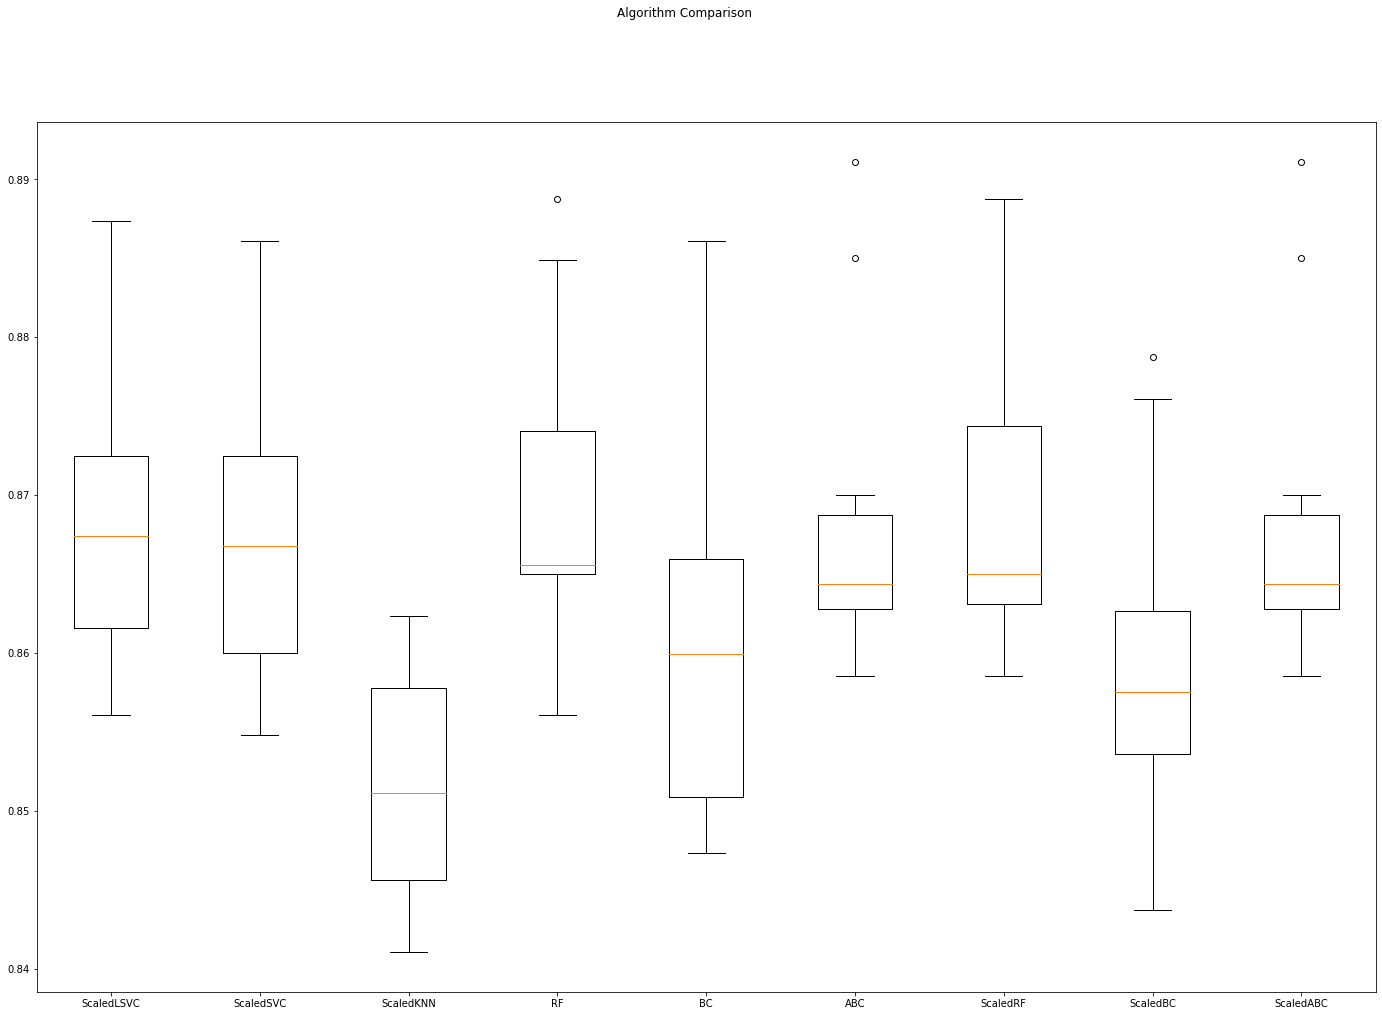

In [29]:
#compare Algorithms
fig=plt.figure(figsize=(24,16))
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


#### most models perform well - we will select Random Forest which not only perform well but also has high explainability

In [30]:
kfold = 1 # adjust this accordingly

#Use gridsearch to fine tune RF (this takes too long)

n_estimators = [200, 500]
max_features = ['auto', 'sqrt']
max_depth = [10, 50, 100]
min_samples_split = [2, 10]
min_samples_leaf = [2, 4]
bootstrap = [True, False]

# for demo only, we are only testing a limited amount of data range
n_estimators = [100]
max_features = ['auto']
max_depth = [None]
min_samples_split = [2]
min_samples_leaf = [1]
bootstrap = [True]

param_grid = {'n_estimators': n_estimators, 
              'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap}
model=RandomForestClassifier()
kfold=KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result=grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))




Best: 0.868684 using {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


#Best: 0.869058 using {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

## Evaluate your model accuracy here
* Print your test/train accuracy (whatever it is)

In [31]:

#finalize
#Best RF: 0.844101 using {'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 500, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 100}
#Prepare the model

model=RandomForestClassifier(n_estimators=100,max_features= 'auto',max_depth= None, min_samples_split= 2,min_samples_leaf= 1, bootstrap= True)
model.fit(X_train, Y_train)

#estimate accuracy on Validation dataset
prediction = model.predict(X_validation)

print(prediction)

[0 0 0 ... 0 0 0]


#### Let's check the feature importance from the random forest tree 



Text(0.5, 0, 'Random Forest Feature Importance')

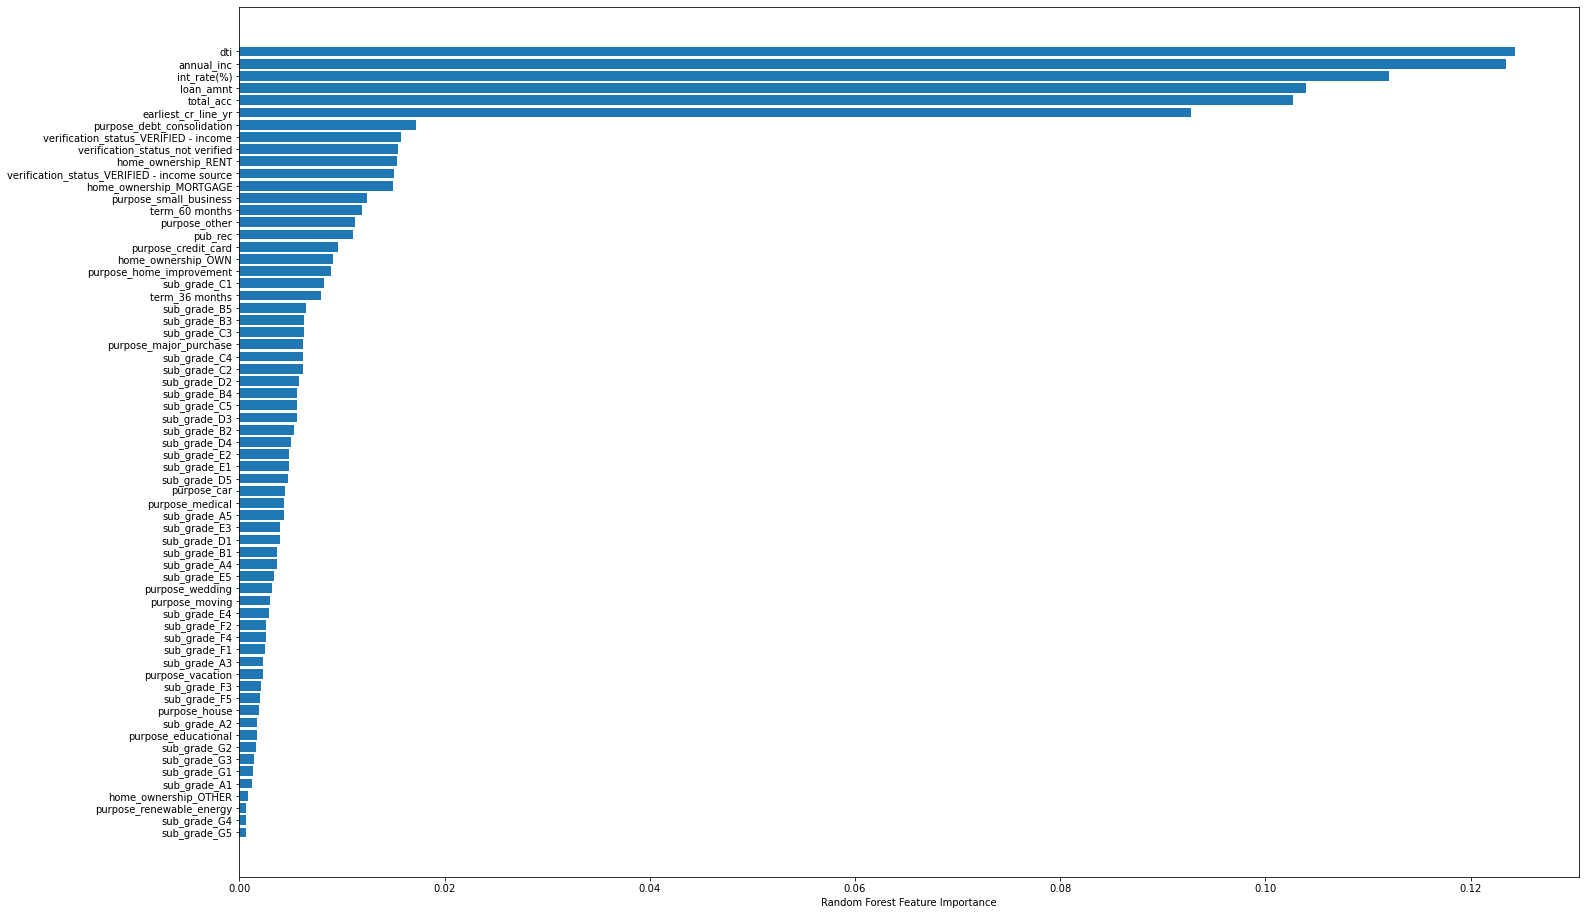

In [32]:
sorted_idx = model.feature_importances_.argsort()
fig=plt.figure(figsize=(24,16))
plt.barh(X.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [33]:
# √ returns the coefficient of determination R^2 of the prediction.
# R^2 tells us how good of fit of the model
result = model.score(X_train, Y_train) 
print("Final Model Performance Result: R^2 score on training set is %f \n\n" % result)

#estimate accuracy on Validation dataset

result_val = model.score(X_validation, Y_validation)

print("Final Model Performance Result: R^2 score on validation set is %f" % result_val)
print("*Note that this validation set is completely unseen by the model during tuning process, and therefore the score on validation set should be the score used for reporting purpose.")

Final Model Performance Result: R^2 score on training set is 1.000000 


Final Model Performance Result: R^2 score on validation set is 0.875938
*Note that this validation set is completely unseen by the model during tuning process, and therefore the score on validation set should be the score used for reporting purpose.


Our model is ready! Let's save the model for future use as needed.

In [34]:
# save the model to disk using pickle
import pickle

filename = 'finalized_RF_model.sav'
pickle.dump(model, open(filename, 'wb'))

The model is now saved, it can be loaded for valuation and for future use. The following code quickly show how to load the model and use it for prediction.

In [35]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Use .predict() to generate prediction
prediction = loaded_model.predict(X_validation)
print("prediction result on validation set")
print(prediction)


prediction result on validation set
[0 0 0 ... 0 0 0]


## Explore your model and answer these questions
You can answer using text, code, or both. 

* **What is the most important feature for your model?**

Text(0.5, 0, 'Random Forest Feature Importance')

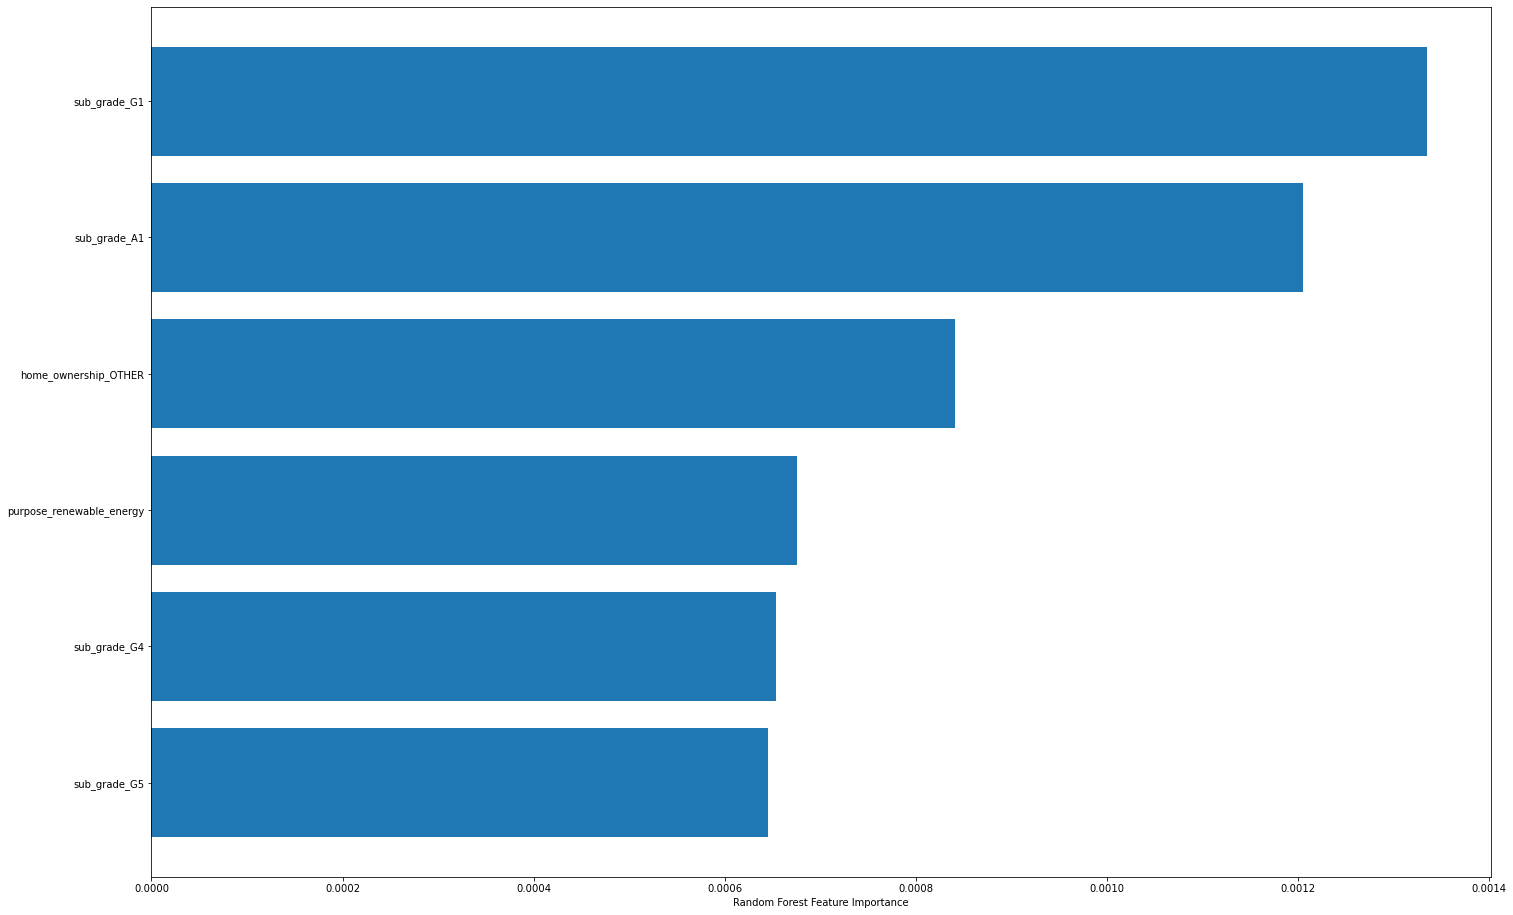

In [36]:
sorted_idx = model.feature_importances_.argsort()
fig=plt.figure(figsize=(24,16))
plt.barh(X.columns[sorted_idx][:6], model.feature_importances_[sorted_idx][:6])
plt.xlabel("Random Forest Feature Importance")

* **Why did you pick this model?**

- model is chosen based on experiemnts, grid search...etc. explainability is also one of the considerations.

* **What were some of the limitations of your approach?**

- accuracy is likely not the best score to use. We will still need to look into class unbalancing issue - will need to confirm if precision or recall is more important: potentially using F1 score or other metrics instead of accuracy
- no grid search is perform on the Random Forest model to save time
- need to review more on overfitting

* **What would you like to try next?**

- domain understanding - some domain knowledge may support feature selection decision making 

- data sampling/reweighting 

- more feature engineering can be conducted to some of the features. For example, a small nlp project or data cleaning on emp_title, desc...etc

- try more iteration on model building - different train/val/split strategy, different model architecture, testing on deep learning models if more data are available, conduct more eda and try more combination of features, conduct PCA for feature reduction to make model lighter, try different feature selection technique (selecting using some statistic method using p value)..etc.

## Conclusion
Save this notebook, it will be your submission. Thank you for participating!

### Thanks for reading! :)